Importing all dependencies 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix, heatmap
import numpy as np
from regression import linear_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

As we can see we can read txt files with read_csv 
convert it with sep argument to csv format 
use usecols argument incase of choosing target featurs


In [21]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv("AmesHousing.txt", sep="\t", usecols=columns)
df.tail(10)

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2920,4,5,546.0,Y,1092,71000
2921,6,5,1728.0,Y,1728,150900
2922,5,5,1728.0,Y,1728,188000
2923,5,5,1126.0,Y,1126,160000
2924,5,7,1224.0,Y,1224,131000
2925,6,6,1003.0,Y,1003,142500
2926,5,5,864.0,Y,902,131000
2927,5,5,912.0,Y,970,132000
2928,5,5,1389.0,Y,1389,170000
2929,7,5,996.0,Y,2000,188000


Incase of checking dimentions of matrix we have we can use shape attribute

In [3]:
df.shape

(2930, 6)

In [22]:
df["Central Air"] = df["Central Air"].map({"N":0,"Y":1})
df["Central Air"]

0       1
1       1
2       1
3       1
4       1
       ..
2925    1
2926    1
2927    1
2928    1
2929    1
Name: Central Air, Length: 2930, dtype: int64

In [56]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [23]:
df.dropna( inplace=True)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

This scatterplotmatrix will plot every combination of our features 

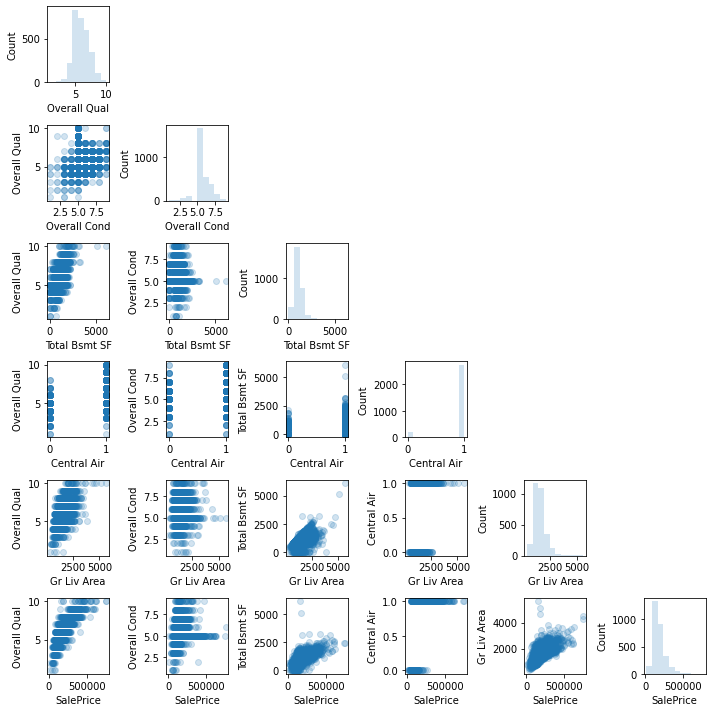

In [58]:
scatterplotmatrix(df.values, figsize=(10,10), names=df.columns ,alpha=0.2)
plt.tight_layout()
plt.show()

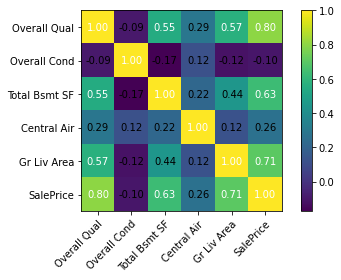

In [6]:
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

In [7]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)
        

In [10]:
x = df["Gr Liv Area"].values
y = df["SalePrice"].values
sc_x = StandardScaler()
sc_y = StandardScaler()
st_x = sc_x.fit_transform(x)
st_y = sc_y.fit_transform(y.reshape((y.shape[0], 1))).flatten()
learner = LinearRegressionGD(eta=0.1)
learner.fit(st_x,st_y)

ValueError: Expected 2D array, got 1D array instead:
array=[1656.  896. 1329. ...  970. 1389. 2000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

This is the whole concept of Normal Equation : 

In [24]:
X = df[["Gr Liv Area","Overall Qual"]].values
y = df["SalePrice"].values
xb = np.hstack((np.ones((X.shape[0], 1)), X))
invers = np.linalg.inv(xb.T.dot(xb))
w = invers.dot(xb.T.dot(y))
w


array([-1.09927834e+05,  5.87551791e+01,  3.32423550e+04])

Using scikit leaarn to calculate coeficient of our Linear Regression model :

In [26]:
learner = LinearRegression()
learner.fit(X,y)
learner.coef_

array([   58.75517908, 33242.35499782])